In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

загрузка данных Диабет

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=names)

Анализ данных

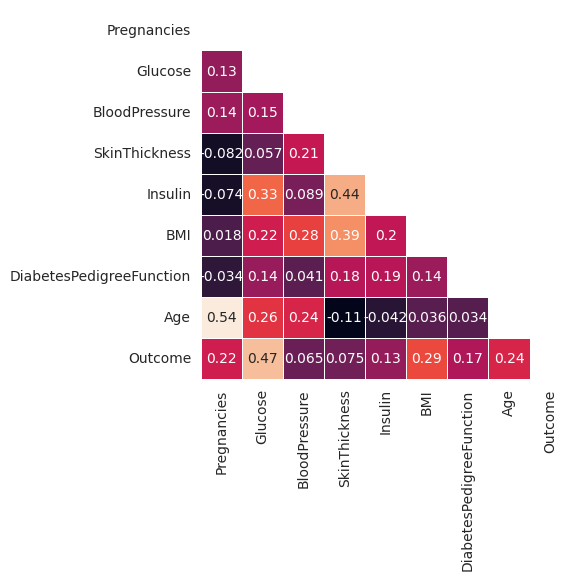

In [5]:
import seaborn as sns
corr = data[data.columns].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

Разделение данных

In [6]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Логистическая регрессия

In [7]:
# 4a. Логистическая регрессия
from sklearn.linear_model import LogisticRegression
log_regress = LogisticRegression(random_state=0)
log_regress.fit(x_train, y_train)
test_predictions = log_regress.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_predictions)
print(" Accuracy:",metrics.accuracy_score (y_test, test_predictions))
cnf_matrix

 Accuracy: 0.7792207792207793


/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[141,  16],
       [ 35,  39]])

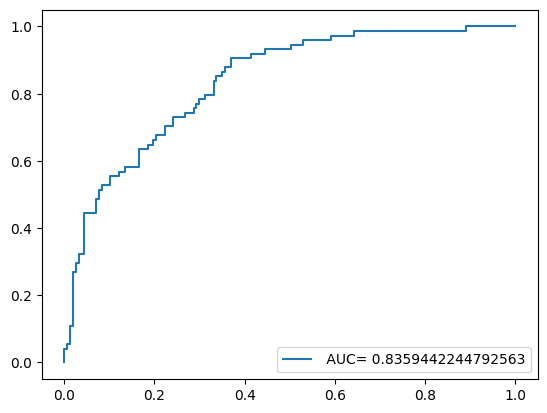

In [8]:
test_predictions_proba = log_regress.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, test_predictions_proba)
auc = metrics.roc_auc_score (y_test, test_predictions_proba)

#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

0.7075285565939772
 Accuracy: 0.7186147186147186
[[126  31]
 [ 34  40]]
0.7485981308411216
 Accuracy: 0.7792207792207793
[[140  17]
 [ 34  40]]
0.7560920733817931
 Accuracy: 0.7619047619047619
[[143  14]
 [ 41  33]]


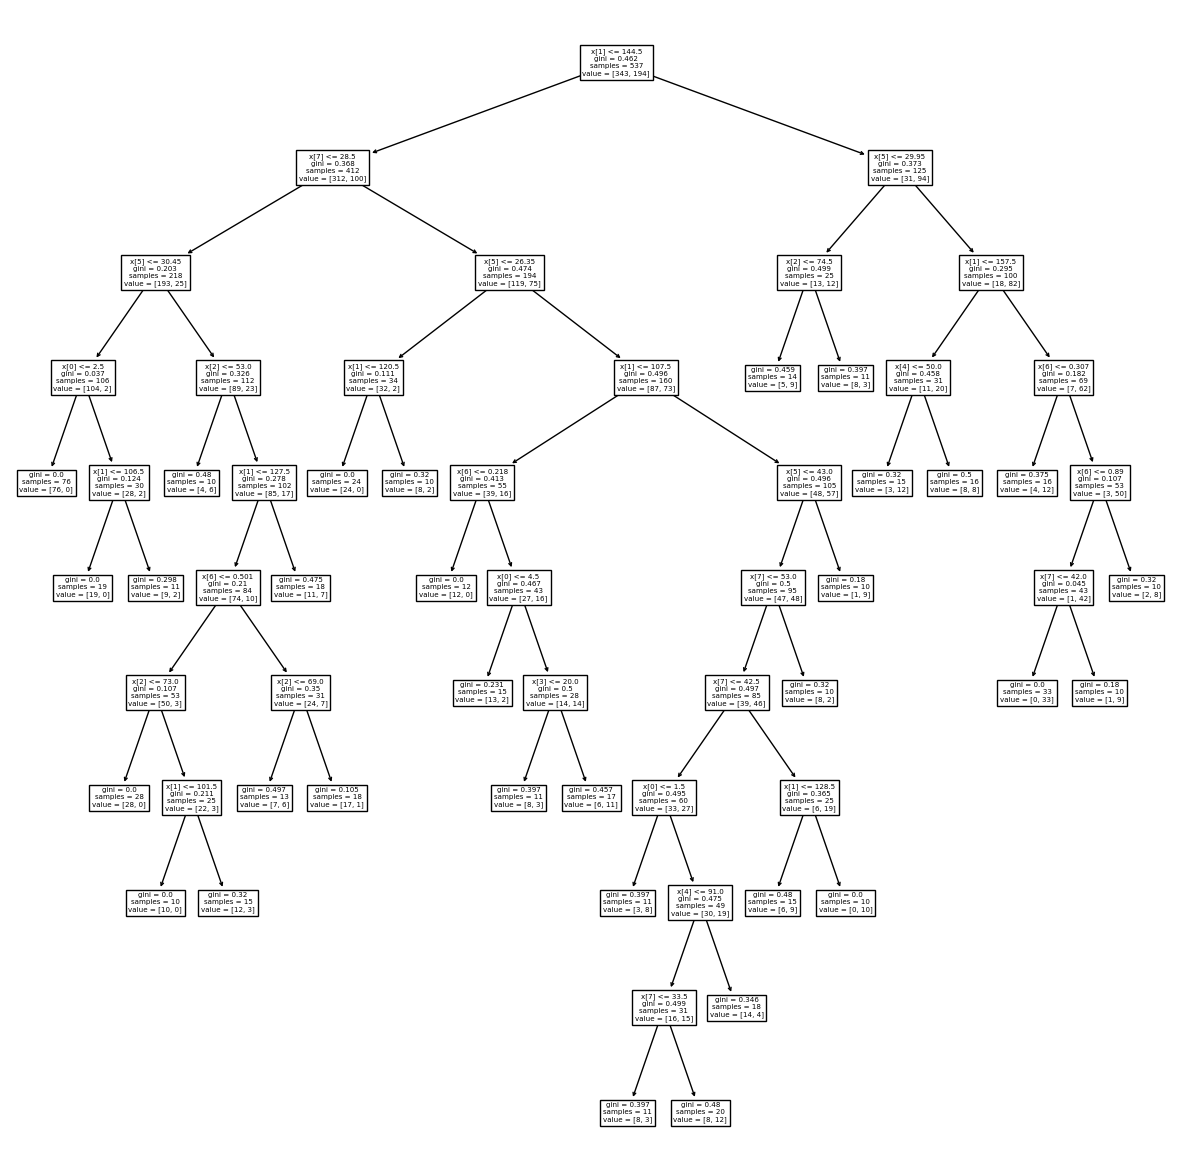

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_DTC = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=10, random_state=0)
clf_DTC.fit(x_train, y_train)
scores = cross_val_score(clf_DTC, x_train, y_train, cv=5)
print(scores.mean())
test_predictions = clf_DTC.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_predictions)
print(" Accuracy:",metrics.accuracy_score (y_test, test_predictions))
#print (metrics.classification_report(y_test, test_predictions))
print (cnf_matrix)
plt.figure(figsize=(15, 15))
tree.plot_tree(clf_DTC)

clf_RFC = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
clf_RFC.fit(x_train, y_train)
scores = cross_val_score(clf_RFC, x_train, y_train, cv=5)
print(scores.mean())
test_predictions = clf_RFC.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_predictions)
print(" Accuracy:",metrics.accuracy_score (y_test, test_predictions))
#print (metrics.classification_report(y_test, test_predictions))
print (cnf_matrix)



clf_ETC = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, max_leaf_nodes=40, random_state=0)
clf_ETC.fit(x_train, y_train)
scores = cross_val_score(clf_ETC, x_train, y_train, cv=5)
print(scores.mean() )
test_predictions = clf_ETC.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_predictions)
print(" Accuracy:",metrics.accuracy_score (y_test, test_predictions))
#print (metrics.classification_report(y_test, test_predictions))
print (cnf_matrix)